### Category Available Requirements
#### Total Points 100
#### Create Models
50 - Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 
#### Model Advantages
10 - Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.
#### Interpret Feature Importance
30 - Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?
#### Interpret Support Vectors
10 - Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

#### Project 1 Feedback
1. You must include all of your data wrangling code, if you want to receive full credit.  Otherwise, your work is not reproducible.  This is true for all submissions. You are the only group who left this out. I need to see what you started with and all transformations. The dataset must still meet the minimum size after all transformations.  I will not accept future labs without this code included.  

2. I have stated multiple times that the minimum dataset size is 15 columns x 30,000 rows = 450,000 elements. My feedback clearly states that what you submitted is currently at 16 * 9731 = 155,696 elements. As I said in the feedback: "In future labs, you will need to increase the number of fields you use for modeling to achieve at least 15 * 30,000 = 450,000 elements.". 

3. Unfortunately for Lab 1, it really makes no difference what your yearly tables may look like at this point, because they were not included in your submission? 

4. I see above that the dataset you produced for each year has many more fields / columns / features that you could have included to meet the minimum size requirements?  The starting point should have likely been that entire dataset.  I am also slightly concerned about your statement that "merging is a simple inner join activity" for a number of reasons. The dataset you started with does not appear to be joined at all.  There is a year column in the dataset.  This gives me the impression that you actually unioned the data by year (which is what I would have expected). However, I really have no clue what you did, because you chose not to share that with me.

Thoughts on inner joining this data:
A number of public school campuses open and close each school year.  If you are joining by unit_code / agency_code, your analysis will only include school campuses open during the entire duration of the data.
Any classification model you create in a "joined" dataset will likely have duplicated columns for each year.  This means that the feature importances for the model will be dominated by prior years.  For example, if you build a model to predict graduation rates, the model will use all prior year's graduation rates for the prediction.  It will also be very accurate.  However, I am not sure what benefit such a model would provide to the public school system?
Typically, you would not include any graduation rate features in your graduation rate model training data at all. (we can talk about this more, if needed).      

### From the Project Sheet
**_A note on grading_** - a common mistake I see in this lab is not investigating different input parameters for each model. Try a number of parameter combinations and discuss how the model changed.

#### CRISP-DM (Cross Industry standard process for data mining)
- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

# MiniLab SVM and Logistic Regression
#### 06/14/2020
#### Yang Zhang, Reannan McDaniel, Jonathon Roach, Fred Poon

## Business Understanding
For this analysis, our group will be working with North Carolina Public Schools Report Card and Statistical Profiles Data sets from the years 2014 to 2017. These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA.  The data is collected from the State of North Carolina at [http://ncpublicschools.org](http://ncpublicschools.org) and made available from the Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools by Dr. Jake Drew. Among other reasons, the data was collected for evaluation of public-school performance for the purpose of efficiently allocating funds to various educational initiatives. Analyses of such data are important because high-impact educational initiatives that are well-funded contribute to increased graduation rates, increased achievement at the post-secondary level, less crime, and greater economic engagement among young people. For the purpose of this exercise, our focus is on describing and predicting school performance using various school characteristics, such as type of school (elementary, middle, high, or some combination of the three), social demographics, economic demographics, and location between 2014 and 2017. The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students". 

<!-- For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based on educational achievement data.-->

We will explore through visual and mathematical modeling which features best predict the School Performance Grade (SPG Grade), a letter grade classification based on test scores and growth measures. The analysis will come in the form of logistic regression model and support vector machine(SVM) model to classify SPG Grade. In this analysis we will observe:

- What attributes have the most effect on SPG?
- Between SVM and Logistic Regression, which model has a higher accuracy score?

<!-- Predicting SPG within 15 points could be beneficial to an organization, like Belk Endowment, to efficiently allocate funds to schools.-->

## Data Understanding
The data set contains 9,731 records and 259 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation). To scale the data to be more manageable, our data set includes 50 of the 259 attributes. 

These variables were chosen after initial EDA and correlation visuals were generated between SPG and all predictors. The data type, category and description are displayed in the following table.

# TODO Update Attributes
### Attributes
| Attribute | DataType | Description |
|:---|:---|:---|
| SPG Score | float64 | School Performance Grade (number, 0-100) |
| SPG Grade | object | School Performance Grade (Letter Grade - A-D, F) |
| avg_daily_attend_pct | float64 | Average daily attendance percentage (0.8-1.0) |
| category_cd | object | Category Code of the school level E=Elementary, M=Middle, H=High School, I=Elem/Mid Combo, A=All Schools |
| category_cd_modified | object | New Feature - simplified category_cd to distinguish between school types vs combined school levels |
| crime_per_c_num | float64 | Number of crimes or acts of violence per 100 students at the school level (0-13) |
| Majority_Minority | object | New Feature - classifying schools as having majority student body from minority racial groups (0 = Majority of non minority, 1 = Majority of minority |
| MinorityFemalePct | float64 | Percentage of female minorities at the school level (0-100) |
| MinorityMalePct | float64 | Percentage of male minorities at the school (0-100) |
| MinorityOverallPct | float64 | New Feature - Minority Overall Percentage (0-100) |
| school_type_txt | object | Description of school type (Regular School, Magnet School, etc.) |
| short_susp_per_c_num | float64 | Short term suspensions per 100 students at the school level (0-181) |
| student_num | float64 | School size or number of students at the school level (8-2966) |
| tchyrs_0thru3_pct | float64 | Percentage of teachers with 0-3 years of teaching experience (0.0-1.0) |
| Year | int64 | New Feature - School Year (2014-2017) |

## Data Preparation
In order to get our data set, we combined multiple years of data.

Script to process the dataset 2014 to 2019 seperately
https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/Data_Prep/PublicSchools2014to2019_MLnew.ipynb

Our data preparation for this project is displayed below.

In [4]:
import pandas as pd
import numpy as np

# read in CSV
df2014 = pd.read_csv('/EducationDataNC/2014/Machine Learning Datasets/PublicSchools2014_MLnew.csv')
df2015 = pd.read_csv('/EducationDataNC/2015/Machine Learning Datasets/PublicSchools2015_MLnew.csv') 
df2016 = pd.read_csv('/EducationDataNC/2016/Machine Learning Datasets/PublicSchools2016_MLnew.csv')
df2017 = pd.read_csv('/EducationDataNC/2017/Machine Learning Datasets/PublicSchools2017_MLnew.csv')
df2018 = pd.read_csv('/EducationDataNC/2018/Machine Learning Datasets/PublicSchools2018_MLnew.csv')
df2019 = pd.read_csv('/EducationDataNC/2019/Machine Learning Datasets/PublicSchools2019_MLnew.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape
df2018.shape
df2019.shape

(2426, 318)

(2432, 335)

(2430, 328)

(2443, 328)

(2460, 599)

(2517, 197)

In [19]:
df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 
df2018['Year'] = 2018 
df2019['Year'] = 2019 

frames = [df2014, df2015, df2016, df2017, df2018, df2019]
df_comb_14to19 = pd.concat(frames,join='inner', ignore_index=True)

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
9726    2017
9727    2017
9728    2017
9729    2017
9730    2017
Name: Year, Length: 9731, dtype: int64

In [ ]:
#Location where the new school datasets will be created.
outputDir = 'C:/Users/taniat470s/Desktop/SMU_course/DS7331/'
df_comb_test.to_csv(outputDir + 'PublicSchools2014to2017_YZ.csv', sep=',', index=False)

The construction of this code chunk above is referenced from Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation)

### Data Workflow

In the starting dataset, all the categoricial variables are stored as "object". In order to be able to utilize it in our machine learning model, we conduct a one-hot encoding procedure to convert all of them into continuous variables. The procedure is shown below.

<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/Data_Workflow.PNG?raw=true" alt="Data Workflow" />

### One-Hot Encoding

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# read in the csv file
schoolData = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/PublicSchools2014to2017_YZ.csv') 

schoolData.head()

,vphone_ad,street_ad,scity_ad,szip_ad,category_cd,url_ad,grade_range_cd,calendar_type_txt,sna_pgm_type_cd,school_type_txt,...,MinorityFemalePct,MinorityMalePct,PacificIslandFemalePct,PacificIslandMalePct,PacificIslandPct,TwoOrMoreFemalePct,TwoOrMoreMalePct,TwoOrMorePct,unit_code,Year
0,(336)506-4001,1247 Jimmie Kerr Road,Graham,27253.0,H,http://amc.abss.k12.nc.us,9-12,"Regular School, Traditional Calendar",R,Regular School,...,0.243243,0.067568,0.000000,0.000000,0.00000,0.000000,0.013514,0.013514,10303,2014
1,(336)578-1366,2518 NC 54,Graham,27253.0,E,http://awe.abss.k12.nc.us,PK-5,"Regular School, Traditional Calendar",R,Regular School,...,0.157699,0.163265,0.000000,0.000000,0.00000,0.014842,0.020408,0.035250,10304,2014
2,(336)538-6030,2832 N NC 87,Elon,27244.0,E,http://aoe.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.094096,0.107011,0.001845,0.001845,0.00369,0.011070,0.012915,0.023985,10308,2014
3,(336)570-6195,2229 Broadview Drive,Burlington,27217.0,M,http://brm.abss.k12.nc.us/,6-8,"Regular School, Traditional Calendar",R,Regular School,...,0.445980,0.463568,0.000000,0.000000,0.00000,0.011307,0.013819,0.025126,10310,2014
4,(336)538-8700,3720 Bonnar Bridge Parkway,Burlington,27215.0,E,http://hle.abss.k12.nc.us,K-5,"Regular School, Traditional Calendar",R,Regular School,...,0.164134,0.173252,0.000000,0.000000,0.00000,0.019757,0.028875,0.048632,10312,2014


In [75]:
#Locate the categorical variables in dataset
sD_nominal = schoolData.loc[:, (schoolData.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = schoolData[sD_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
schoolData.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
schoolData.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 250 entries, szip_ad to Year
dtypes: float64(237), int64(2), object(11)
memory usage: 18.6+ MB

Columns Deleted:  9


#### SPG Grade - Response Variable

"SPG Grade" is our response variable and "SPG Score" is the continous expression of it. "SPG Score" is a composite score calculated from schools' average scores based on multiple assessments. The "SPG Grade" is converted from "SPG Score" by ranges. We have to remove them from the original dataset.

In [5]:
#Keep an original copy of the Data
schoolData_org = schoolData

#Pop out the SPG information from the Data
schoolData_SPG = schoolData.pop('SPG Grade')
schoolData_SPGScore = schoolData.pop('SPG Score')

schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 248 columns):
szip_ad                                float64
category_cd                            object
calendar_type_txt                      object
sna_pgm_type_cd                        object
school_type_txt                        object
calendar_only_txt                      object
title1_type_cd                         object
esea_status                            object
student_num                            float64
lea_avg_student_num                    float64
st_avg_student_num                     float64
Grad_project_status                    object
Math I_Size                            float64
lea_total_expense_num                  float64
lea_salary_expense_pct                 float64
lea_services_expense_pct               float64
lea_supplies_expense_pct               float64
lea_instruct_equip_exp_pct             float64
lea_federal_perpupil_num               float64
lea_loc

Per the analysis, we found that a few attributes were directly used to calculate our response variable. With this in mind, we'll remove these attributes from the dataset.  Features which are discarded include end-of-course, end-of-grade scores and any features related to EVAAS growth metrics. For example: EOG_XXX, EOC_XXX.
<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/SPG_brief.JPG?raw=true" alt="SPG calculators" />

After removing them, we display the information of the variables to make sure we don't have them in the dataset anymore.

In [80]:
# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 21:162], inplace=True, axis=1)
schoolData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 107 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

The below procedure do the one-hot encoding for the left categorical variable. As shown below we have a total of 20 categorical variables to encode and we end up with 40 variables after the encoding process.

In [82]:
#Isolate remaining categorical variables
begColumnCt = len(schoolData.columns)

#one hot encode categorical variables
schoolData = pd.get_dummies(data=schoolData,drop_first=True)

#Determine change in column count
endColumnCt = len(schoolData.columns)
columnsAdded = endColumnCt - begColumnCt

#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(sD_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
schoolData.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

Columns To One-Hot Encode:  20

*********After: Adding New Columns Via One-Hot Encoding*************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 145 entries, szip_ad to Category_Cd_T
dtypes: float64(96), int64(2), uint8(47)
memory usage: 7.7 MB

New Columns Created Via One-Hot Encoding:  38


A dimension check of the dataset after the one-hot encoding process shows that we have a total of 9371 records with 148 seperate variables. All of the variables are in numerical format now.

In [83]:
# Dimension of Dataset
schoolData.shape

schoolData.head()

(9731, 145)

,szip_ad,student_num,lea_avg_student_num,st_avg_student_num,Math I_Size,lea_total_expense_num,lea_salary_expense_pct,lea_services_expense_pct,lea_supplies_expense_pct,lea_instruct_equip_exp_pct,...,esea_status_RF,esea_status_RP,Grad_project_status_N,Grad_project_status_Y,Category_Cd_A,Category_Cd_E,Category_Cd_H,Category_Cd_I,Category_Cd_M,Category_Cd_T
0,27253.0,78.0,954.0,837.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,1,0,0,0,1,0,0,0
1,27253.0,539.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0
2,27244.0,547.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0
3,27217.0,800.0,768.0,665.0,26.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,0,0,0,1,0
4,27215.0,664.0,518.0,496.0,0.0,8028.59,0.613,0.078,0.086,0.011,...,0,0,0,0,0,1,0,0,0,0


### Feature Selection

We original have 148 features in the data table. We don't want to include this many features for model feasibility. However, as we have a data size requirement, and we also want the constructing model to be high quality. We decide to conduct a feature selection process to choose the most important features to use.

There are many ways to conduct feature selection. In this project we use random forest and plot out feature importances of all features. The work below is not for feasible model construction (we didn't split train/test) but just for picking out the most important variables to use.  

In [84]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(schoolData,schoolData_SPG)
y_pred=clfa.predict(schoolData)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy = 1.0 does not surprise us because we didn't to train/test splitting. 

In [85]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(schoolData_SPG, y_pred))

Accuracy: 1.0


Below plot reflect what features are important and their according weights.

In [86]:
#For feature importance
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(schoolData,schoolData_SPG)
eli5.show_weights(perm, feature_names = schoolData.columns.tolist(), top=50)

Weight,Feature
0.0412 ± 0.0036,TotalTargets_pTarget_PctMet
0.0091 ± 0.0014,MinorityMalePct
0.0032 ± 0.0006,MinorityFemalePct
0.0022 ± 0.0005,short_susp_per_c_num
0.0015 ± 0.0006,avg_daily_attend_pct
0.0012 ± 0.0004,title1_type_cd_Y
0.0011 ± 0.0003,BlackMalePct
0.0009 ± 0.0005,AsianFemalePct
0.0005 ± 0.0004,BlackFemalePct
0.0004 ± 0.0002,HispanicMalePct


To meet the data size requirement, we need to have as least 450,000/9371 = 48 variables to use for the data. 

To satisfy this we pick the first 50 variables to use. Notice that in the below variable list there are both continuous variables and the categorical variables after one-hot encoding. 

In [88]:
#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

(9731, 50)

### Training/Testing Splitting

To prepare our official SVM and Logistic regression modeling procedure, we need to split the dataset into training and testing set. We use the ShuffleSplit criteria below. We use a proportion of 80/20 for the training/testing dataset.

In [89]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 3
num_instances = len(schoolData_SPG)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)
                         
print(cv_object)

ShuffleSplit(n_splits=3, random_state=None, test_size=0.2, train_size=None)


In [90]:
# Split X and Y into Training and Testing dataset
for train_indices, test_indices in cv_object.split(schoolData_pick,schoolData_SPG): 

    Xsel_train = schoolData_pick.values[train_indices]
    ysel_train = schoolData_SPG.values[train_indices]
    Xall_train = schoolData.values[train_indices]
    
    Xsel_test = schoolData_pick.values[test_indices]
    ysel_test = schoolData_SPG.values[test_indices]
    Xall_test = schoolData.values[test_indices]

 With our feature selection (51 variables), check and make sure it contains most information. The way we conduct the validation is by running another random forest and check the accuracy. This accuracy of the current model (acc=0.733) is close to the model utilizing all the variables (acc=0.736). So we varify that our selection is reasonable.

In [91]:
# Random Forest fitting with selective variables
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(Xsel_train,ysel_train)
y_pred_rf=clf_rf.predict(Xsel_test)

# Random Forest fitting with all variables
clf_rf_all=RandomForestClassifier(n_estimators=100)
clf_rf_all.fit(Xall_train,ysel_train)
y_pred_rf_all=clf_rf_all.predict(Xall_test)

print("Model with Selective Variables Accuracy:",metrics.accuracy_score(ysel_test, y_pred_rf))
print("Model with All Variables Accuracy:",metrics.accuracy_score(ysel_test, y_pred_rf_all))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Model with Selective Variables Accuracy: 0.7170005136106831
Model with All Variables Accuracy: 0.7149460708782742


### Solving Data Imbalance

We find that our response variable (SPG_Grade) has a data balancing problem: The grade C is dominate the dataset with the largest propertion, followed by B or D. A and F are just a small propertion of the whole dataset. 

First we investigate the current class of the SPG Grade and found that the class "A" and "A+NG" are identical so we merge the two.Notice that magnet schools in 2016-2017 are not required to report SPG score. Those schools with incomplete information are marked "I". the class "I" are removed from the dataset.

In [92]:
schoolData_SPG_org = schoolData_SPG
schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

,0
count,9216
unique,5
top,C
freq,3973


After merging the class, we can see below a distribution of current SPG Grade. The grade C is dominate the dataset with the largest propertion, followed by B or D. A and F are just a small propertion of the whole dataset. We need to re-balance the data.

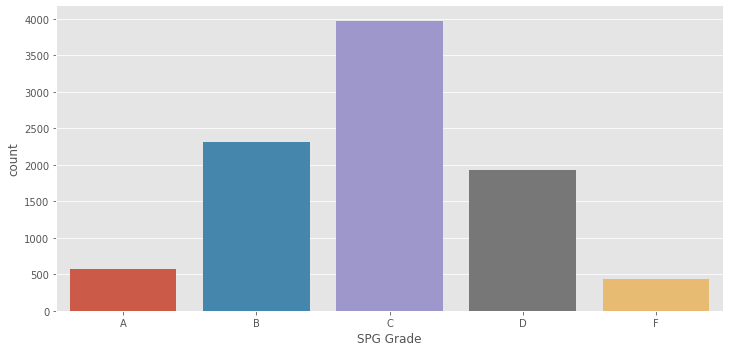

In [93]:
#Factor Plot for SPG Grade
s.columns=['SPG Grade']
                        
sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

To solve this problem, we are using the crieteria below.

#### Test 3 types of sampler: UnderSample all cases, UnderSample majority class, SMOTE Oversample

Below we conduct 3 seperate procedures to produce 3 seperate sets of X and y from the original dataset. Those sets will be evaluate against each other and we will decide the best data balancing strategy to use.

In [94]:
# Check the dimension for X and y
schoolData_pick_new.shape
schoolData_SPG_new.shape

(9216, 50)

(9216,)

In [95]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_us)

In [96]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')
X_us_maj, y_us_maj = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_us_maj)

In [97]:
from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Plot the new class distributions for y using the same funnction as above. 
#plot_class_dist(y_sm)

By comparing the results for the 3 different methods dealing with data imbalance, we run random forest with the datasets we generated. Accuracy are measured with the results of the variables. As shown the SMOTE strategy get the highest accuracy. It will be used for the later SVM and Logistic regression fitting.

In [98]:
#Training using Undersample Method1 
for train_indices, test_indices in cv_object.split(X_us,y_us): 

    X_train = X_us.values[train_indices]
    y_train = y_us.values[train_indices]
    
    X_test = X_us.values[test_indices]
    y_test = y_us.values[test_indices]
    

clfus=RandomForestClassifier(n_estimators=100)
clfus.fit(X_train,y_train)
y_pred_us=clfus.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_us))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.6790697674418604


In [99]:
#Training using Undersample Method2
for train_indices, test_indices in cv_object.split(X_us_maj,y_us_maj): 

    X_train = X_us_maj.values[train_indices]
    y_train = y_us_maj.values[train_indices]
    
    X_test = X_us_maj.values[test_indices]
    y_test = y_us_maj.values[test_indices]
    
clfusm=RandomForestClassifier(n_estimators=100)
clfusm.fit(X_train,y_train)
y_pred_usm=clfusm.predict(X_test)
    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_usm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.788546255506608


In [100]:
#Training using Oversample Method
for train_indices, test_indices in cv_object.split(X_sm,y_sm): 

    X_train = X_sm.values[train_indices]
    y_train = y_sm.values[train_indices]
    
    X_test = X_sm.values[test_indices]
    y_test = y_sm.values[test_indices]

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8733954190787818


In [25]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.1, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'lbfgs']}

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   5.5s
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   4.7s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   5.5s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   5.5s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   5.2s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.1min finished


Wall time: 6min 40s


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
print(grid.best_params_)

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Modeling
### Logistic Regression

First, let's split the original dataset (with No SMOTE balancing) to train/test, and do Logistic Regression.

In [101]:
# Split X and Y into Training and Testing dataset
for train_indices_org, test_indices_org in cv_object.split(schoolData_pick_new,schoolData_SPG_new): 

    Xsel_train = schoolData_pick_new.values[train_indices_org]
    ysel_train = schoolData_SPG_new[train_indices_org]
    
    Xsel_test = schoolData_pick_new.values[test_indices_org]
    ysel_test = schoolData_SPG_new[test_indices_org]

In [102]:
#  Logistic regression fit with the original dataset
from sklearn.metrics import accuracy_score
lr_model_org = LogisticRegression()

lr_model_org.fit(Xsel_train, ysel_train)
pred_org = lr_model_org.predict(Xsel_test)

accuracy_score(ysel_test, pred_org)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.4761388286334056

In [103]:
#  Logistic regression fit with the SMOTE dataset
lr_model = LogisticRegression()

lr_model.fit(X_train, y_train)
pred = lr_model.predict(X_test)

accuracy_score(y_test, pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.46740498363956706

In [104]:
#Lasso
#Using the grid search parameters
model2 = LogisticRegression(C=100, penalty='l1', solver='liblinear')

model2.fit(X_train, y_train)
pred = model2.predict(X_test)

accuracy_score(y_test, pred)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

0.6652403725144727

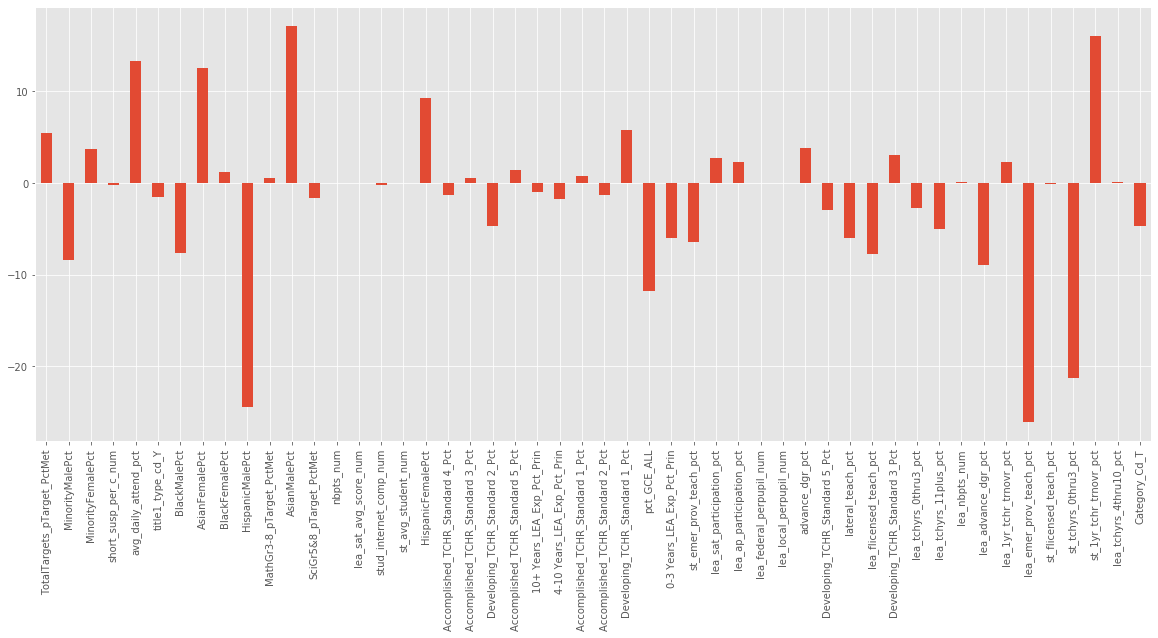

In [105]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(model2.coef_[0],index=schoolData_pick_new.columns)
weights.plot(kind='bar',figsize=(20,8))
plt.show()

[[664  99   3   6   1]
 [134 455 168  22   4]
 [ 12 176 411 195  19]
 [  0  25 131 424 225]
 [  0   3  10  97 689]]


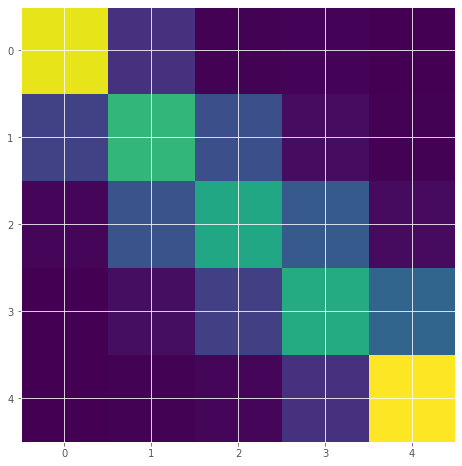

In [106]:
# Confusion Matrix
conf = mt.confusion_matrix(y_test,pred)

print(conf )

f = plt.figure(figsize=(8,8))
plt.imshow(conf)

### Support Vector Machine (SVM)
First, let's split the original dataset (with No SMOTE balancing) to train/test, and do SVM.

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scl_obj = StandardScaler()

Xorg_train_scaled = scl_obj.fit_transform(Xsel_train) # apply to training
Xorg_test_scaled = scl_obj.fit_transform(Xsel_test) 

In [108]:
%%time
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(Xorg_train_scaled, ysel_train)  # train object

y_hat = svm_clf.predict(Xorg_test_scaled) # get test set precitions

acc = mt.accuracy_score(ysel_test,y_hat)
conf = mt.confusion_matrix(ysel_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.6670281995661606
[[ 63  60   8   0   0]
 [ 12 269 162   4   0]
 [  0  66 663  65   0]
 [  0   1 155 225   3]
 [  0   0   5  73  10]]
Wall time: 5.81 s


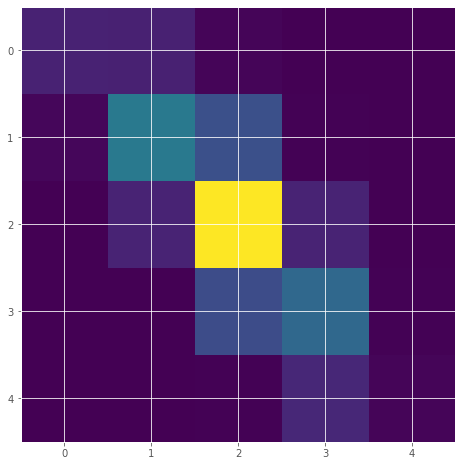

In [109]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

The accuracy for the above model is around 70%. However the confusion matrix shows that because the data is imbalance, the accuracy across different class are a lot different from each other. For example, the accuracy rate of C is much higher than other class.

Below we are using the SMOTE balanced dataset for SVM work:

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scl_obj = StandardScaler()

Xs2_train_scaled = scl_obj.fit_transform(X_train) # apply to training
Xs2_test_scaled = scl_obj.fit_transform(X_test) 

In [111]:
%%time
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
from sklearn import metrics as mt

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(Xs2_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(Xs2_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.7865592751069721
[[718  51   3   1   0]
 [ 95 571 109   7   1]
 [  5 163 512 131   2]
 [  0   6 111 585 103]
 [  0   0   5  55 739]]
Wall time: 22.7 s


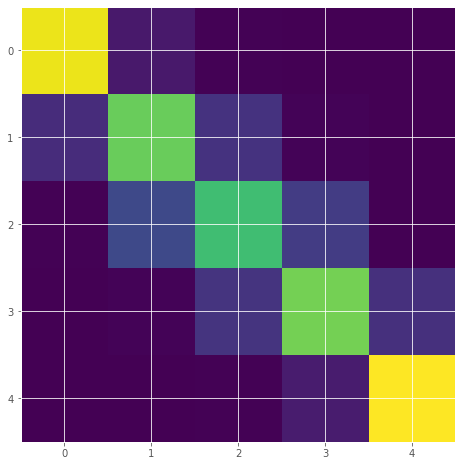

In [112]:
f = plt.figure(figsize=(8,8))
plt.imshow(conf)

In [113]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(10941, 50)
(10941,)
[1234 2619 2947 2677 1464]


In [48]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(Xs2_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  29.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.2s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  29.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  27.5s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.7s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.8s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ................... C=0.1, gamma=1, kernel=sigmoid, total=  12.9s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 40.5min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [49]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [115]:
svm_clf_gs = SVC(C=10, kernel='rbf', degree=3, gamma=0.1) # get object
svm_clf_gs.fit(Xorg_train_scaled, ysel_train)  # train object

y_hat_gs = svm_clf_gs.predict(Xs2_test_scaled) # get test set precitions

#grid_predictions = grid.predict(Xs2_test_scaled)
#acc = mt.accuracy_score(y_test, grid_predictions)
acc = mt.accuracy_score(y_test, y_hat_gs)

print(acc)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.853007802668009


*********
****I am re-assigning colnames for plotting, let me know if you have a better way to do that.

In [116]:
schoolData_sm = pd.DataFrame(X_sm)
schoolData_sm.columns=['TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]

In [117]:
df_tested_on = schoolData_sm.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['SPG Grade'] = y_sm.values[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
#X_sub['SPG Grade'] = y # also add it back in for the original data
schoolData_sm['SPG Grade'] = y_sm # also add it back in for the original 
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10941 entries, 2826 to 18334
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TotalTargets_pTarget_PctMet       10941 non-null  float64
 1   MinorityMalePct                   10941 non-null  float64
 2   MinorityFemalePct                 10941 non-null  float64
 3   short_susp_per_c_num              10941 non-null  float64
 4   avg_daily_attend_pct              10941 non-null  float64
 5   title1_type_cd_Y                  10941 non-null  uint8  
 6   BlackMalePct                      10941 non-null  float64
 7   AsianFemalePct                    10941 non-null  float64
 8   BlackFemalePct                    10941 non-null  float64
 9   HispanicMalePct                   10941 non-null  float64
 10  MathGr3-8_pTarget_PctMet          10941 non-null  float64
 11  AsianMalePct                      10941 non-null  float64
 12  S

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'st_tchyrs_0thru3_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'st_tchyrs_0thru3_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'avg_daily_attend_pct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'avg_daily_attend_pct (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'short_susp_per_c_num (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'short_susp_per_c_num (Original)')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'MinorityFemalePct (Instances chosen as Support Vectors)')

Text(0.5, 1.0, 'MinorityFemalePct (Original)')

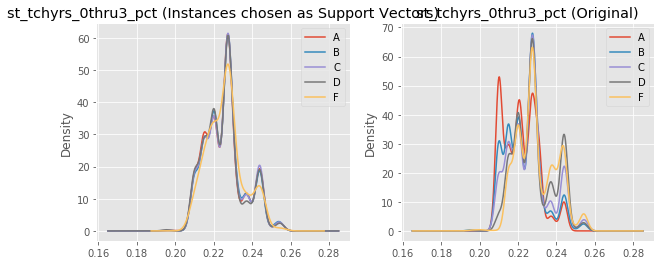

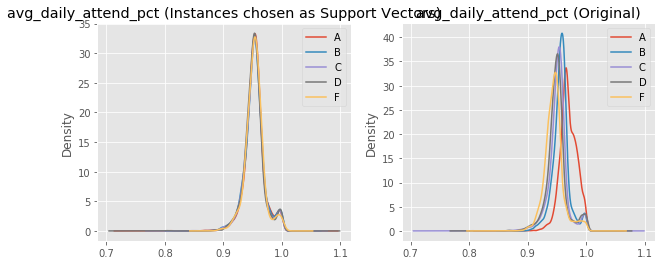

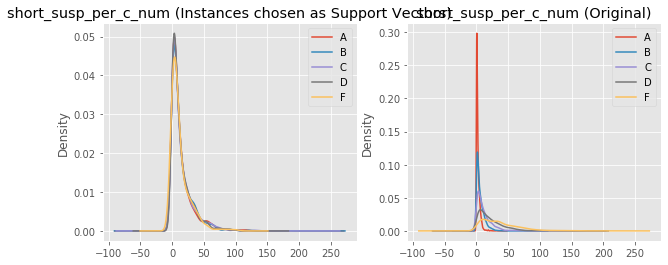

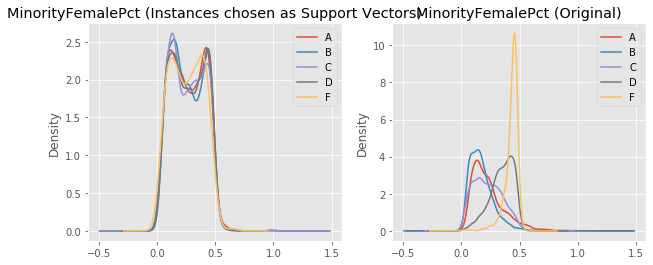

In [119]:
# now lets see the statistics of these attributes
#from pandas.tools.plotting import boxplot
from pandas.plotting import boxplot
from matplotlib import pyplot as plt

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['SPG Grade'])
#df_grouped = X_sub.groupby(['SPG Grade'])
df_grouped = schoolData_sm.groupby(['SPG Grade'])

# plot KDE of Different variables
###########This is a random selection NOW
vars_to_plot = ['st_tchyrs_0thru3_pct','avg_daily_attend_pct','short_susp_per_c_num','MinorityFemalePct']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['A','B','C','D','F'])
    plt.title(v+' (Original)')

In [ ]:
# data clean up

# schools2['category_cd'].unique()
schoolData_sm['category_cd_modified'] = np.select(
    [
        schoolData_sm['category_cd'] == 'A', 
        schoolData_sm['category_cd'] == 'E',
        schoolData_sm['category_cd'] == 'H',
        schoolData_sm['category_cd'] == 'I',
        schoolData_sm['category_cd'] == 'M'
    ], 
    [
        'Elem./Mid./High Together', 
        'Elementary School',
        'High School',
        'Elem./Mid. Together',
        'Middle School'
    ],
    default='Mid./High Together'
)

combo = schoolData_sm['category_cd_modified'].str.contains('/', regex=False)

schoolData_sm['category_cd_modified'] = np.where(combo, 'Combo', schoolData_sm['category_cd_modified'])
schoolData_sm['MinorityOverallPct'] = schoolData_sm['MinorityMalePct'] + schoolData_sm['MinorityFemalePct']
schoolData_sm['Majority_Minority'] = np.where(schoolData_sm['MinorityOverallPct'] > .5, 1,0)
schoolData_sm = schoolData_sm[schoolData_sm["school_type_txt"] == 'Regular School']

combo = schoolData_sm['SPG Grade'].str.contains('A+NG', regex=False)

schoolData_sm['SPG Grade'] = np.where(combo, 'A', schoolData_sm['SPG Grade'])
# df_final['SPG Grade'].value_counts()
schoolData_sm = schoolData_sm[schoolData_sm['SPG Grade'] != 'I']
schoolData_sm['SPG Grade'].value_counts()
schoolData_sm.info()

In [ ]:
from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import 

# pipe = Pipeline([RandomForestClassifier(n_estimators=)])

param_grid = {'C': [0.1, 10, 100], 'penalty': ['l1','l2'], 'solver': ['liblinear']}
 

grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train_scaled, y_train)

## Evaluation